![](download.png)

## Load an important liberary and load dataset

### Load an important liberay

In [1]:
#Importing the necessary packages into our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 
from sklearn.metrics import accuracy_score,precision_score,plot_roc_curve
from sklearn.metrics import recall_score,f1_score

### Load our dataset for the project and implement dataset exploration

In [2]:
data = pd.read_csv('data/heart-disease.csv')

In [3]:
# View our dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

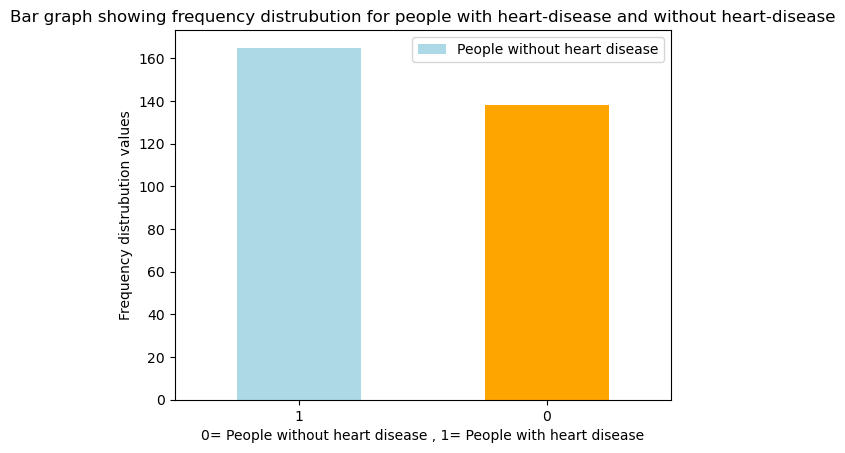

In [6]:
data['target'].value_counts().plot(kind="bar",color = ['lightblue','orange']);
plt.title("Bar graph showing frequency distrubution for people with heart-disease and without heart-disease");
plt.xlabel("0= People without heart disease , 1= People with heart disease");
plt.ylabel('Frequency distrubution values');
plt.legend(['People without heart disease']);
plt.xticks(rotation=0);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.crosstab(data["target"],data["sex"])

sex,0,1
target,,
0,24,114
1,72,93


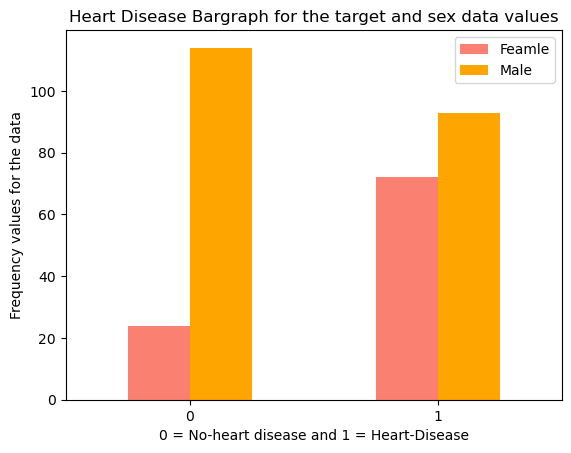

In [11]:
pd.crosstab(data.target,data.sex).plot(kind='bar',color=['salmon','orange']);
plt.title("Heart Disease Bargraph for the target and sex data values");
plt.xlabel('0 = No-heart disease and 1 = Heart-Disease');
plt.ylabel('Frequency values for the data');
plt.legend(['Feamle','Male']);
plt.xticks(rotation=0);

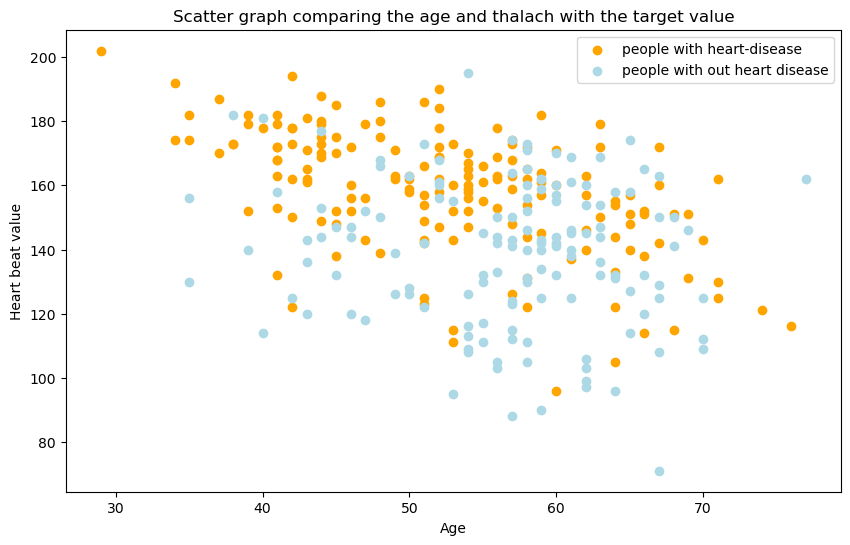

In [12]:
# create a scatter graph for our dataset

#scatter graph for the people who have heart disease
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c = ["orange"]);
#scatter graph for the people who have no any heart disease
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c=['lightblue']);
plt.title("Scatter graph comparing the age and thalach with the target value");
plt.xlabel('Age');
plt.ylabel('Heart beat value');
plt.legend(["people with heart-disease","people with out heart disease"]);

In [13]:
# Compare the chestpain datavalue with the target dataset
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


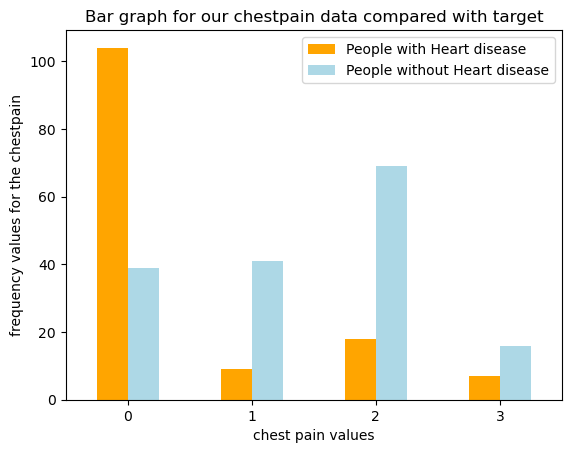

In [14]:
pd.crosstab(data.cp,data.target).plot(kind="bar",color=['orange','lightblue']);

# Decorate our bar graph
plt.title("Bar graph for our chestpain data compared with target");
plt.xlabel("chest pain values");
plt.ylabel("frequency values for the chestpain");
plt.legend(['People with Heart disease','People without Heart disease']);
plt.xticks(rotation=0);

In [15]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


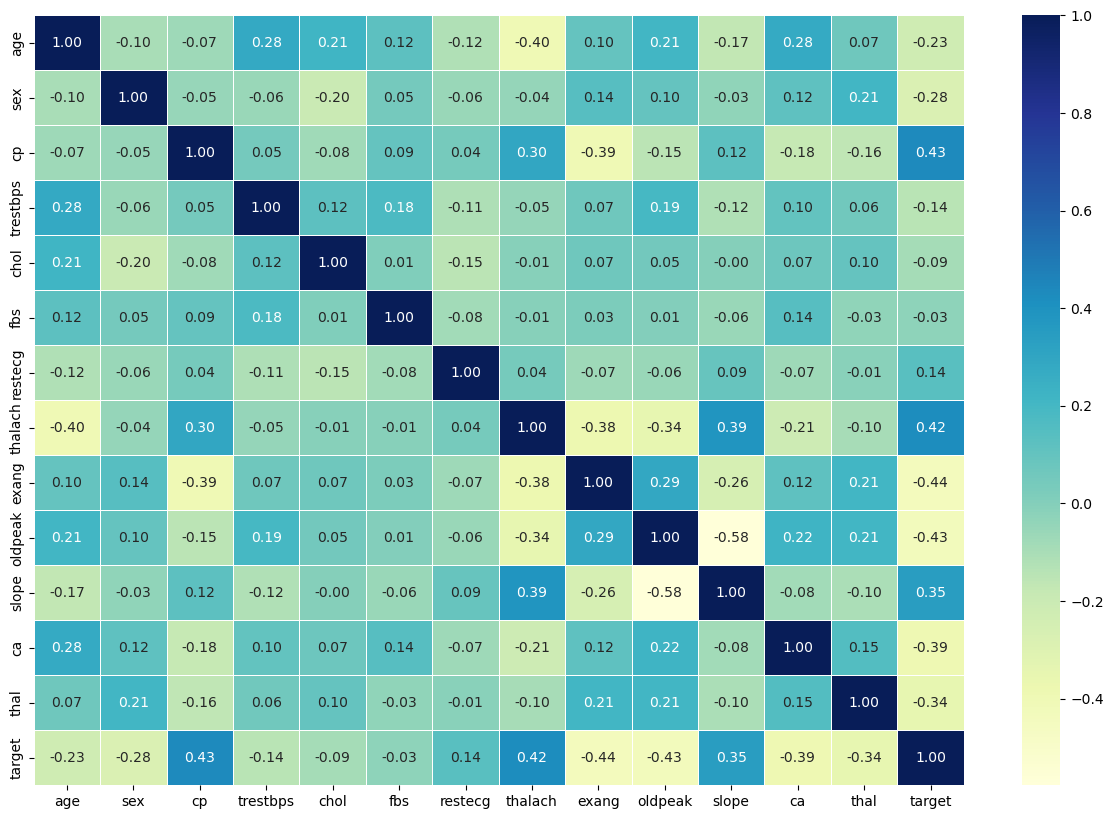

In [16]:
correlation_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

## Model,Training,and Testing our data

### Step1: Separating our training data from the target data( Creating X and Y labels)

In [17]:
X = data.drop("target",axis=1)
Y = data['target']

In [18]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [19]:
Y.head(2)

0    1
1    1
Name: target, dtype: int64

### Step2: Split our labels into training and testing data

In [20]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
x_train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3


In [22]:
x_test.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [23]:
np.array(y_train)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [24]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### step3: Fit our data to the selected modeling algorithms

In [25]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
knn_model = KNeighborsClassifier()
log_regmodel = LogisticRegression()
RandomForest_model = RandomForestClassifier()

knn_model.fit(x_train,y_train);
log_regmodel.fit(x_train,y_train);
RandomForest_model.fit(x_train,y_train);

C:\Users\GL\Desktop\project2\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### step4: Test our scores for each modeling algorithm 

                Knn Model Score Result:0.6885245901639344
Logistic Regression Model Score Result:0.8852459016393442
       RandomForest Model Score Result:0.8360655737704918


(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'RandomForestClassifier')])

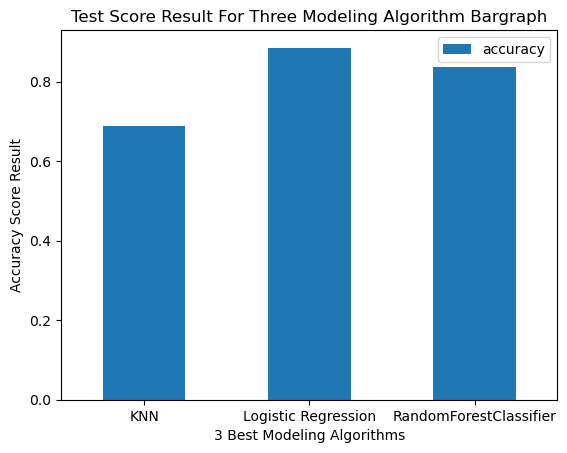

In [26]:
np.random.seed(42)
knn_model_score = knn_model.score(x_test,y_test)
log_regmodel_score = log_regmodel.score(x_test,y_test)
Rand_forest_model_score = RandomForest_model.score(x_test,y_test)

print(f"                Knn Model Score Result:{knn_model_score}")
print(f"Logistic Regression Model Score Result:{log_regmodel_score}")
print(f"       RandomForest Model Score Result:{Rand_forest_model_score}")

model_score = {'KNN':knn_model_score,
              'Logistic Regression':log_regmodel_score,
              'RandomForestClassifier':Rand_forest_model_score};
model_score_df = pd.DataFrame(model_score,index=["accuracy"])
model_score_df.T.plot(kind='bar')
plt.title("Test Score Result For Three Modeling Algorithm Bargraph");
plt.ylabel("Accuracy Score Result");
plt.xlabel("3 Best Modeling Algorithms");
plt.xticks(rotation=0)

### Step5:Tune our model score result using 3 methods.

### Method1: Tunning by hand

In [27]:
# Tunning for KNN
train_scores = []
test_scores = []
np.random.seed(42)
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test)) 
    
# Tunning For RandomForest Classifier
train_scores1 = []
test_scores1 = []

estimators = range(100,1300,100);
RandForest = RandomForestClassifier()

for j in estimators:
    RandForest.set_params(n_estimators=j)
    RandForest.fit(x_train,y_train)
    train_scores1.append(RandForest.score(x_train,y_train))
    test_scores1.append(RandForest.score(x_test,y_test))

The maximum score recorded for KNN model tunned test score result is:75.41%


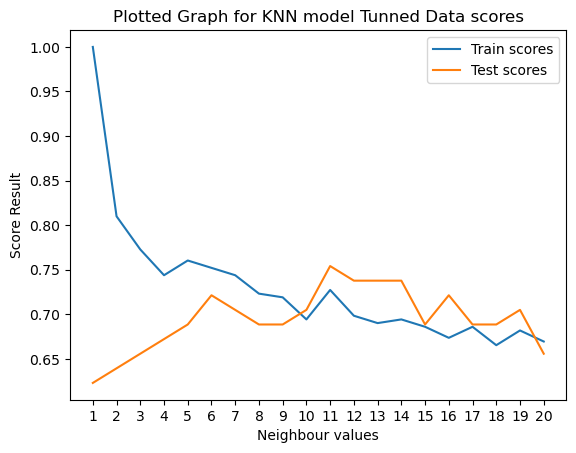

In [28]:
# visualize our tunned dataset results
plt.plot(neighbors,train_scores,label = "Train scores")
plt.plot(neighbors,test_scores,label = "Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.title("Plotted Graph for KNN model Tunned Data scores")
plt.xlabel("Neighbour values")
plt.ylabel("Score Result")
plt.legend()
print(f"The maximum score recorded for KNN model tunned test score result is:{max(test_scores)*100:.2f}%")

The maximum score recorded for Random Forest model tunned test score result is:86.89%


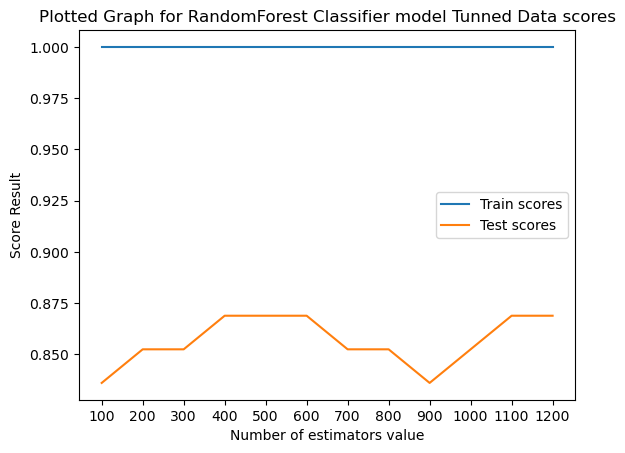

In [29]:
plt.plot(estimators,train_scores1,label = "Train scores")
plt.plot(estimators,test_scores1,label = "Test scores")
plt.xticks(np.arange(100,1300,100))
plt.title("Plotted Graph for RandomForest Classifier model Tunned Data scores")
plt.xlabel("Number of estimators value")
plt.ylabel("Score Result")
plt.legend()

print(f"The maximum score recorded for Random Forest model tunned test score result is:{max(test_scores1)*100:.2f}%")


### Method2: Tunning Using RandomizedSearchCV

In [30]:
np.random.seed(42)
log_reg_dict = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_dict = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_dict,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_dict,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

rs_log_reg.fit(x_train, y_train);
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
rs_log_reg.best_params_,rs_rf.best_params_

({'solver': 'liblinear', 'C': 0.23357214690901212},
 {'n_estimators': 360,
  'min_samples_split': 4,
  'min_samples_leaf': 15,
  'max_depth': 5})

In [32]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [33]:
rs_rf.score(x_test,y_test)

0.8688524590163934

### Method3: Tunning Using GridSearchCV

In [34]:
np.random.seed(42)
log_reg_dict = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_dict = {"n_estimators": np.arange(100, 1000, 300),
           "max_depth": [5, 10],
           "min_samples_split": np.arange(2, 10, 4),
           "min_samples_leaf": np.arange(1, 10, 4)}

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_dict,
                                cv=5,
                                verbose=True)
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_dict,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);
gs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [35]:
gs_log_reg.best_params_,gs_rf.best_params_

({'C': 0.23357214690901212, 'solver': 'liblinear'},
 {'max_depth': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 6,
  'n_estimators': 100})

In [36]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [37]:
gs_rf.score(x_test,y_test)

0.8524590163934426

## Evaluating Our Best Model

### Evaluating our classification model using ROC and AUC curve

In [38]:
y_preds = rs_log_reg.predict(x_test)

In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\GL\Desktop\project2\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


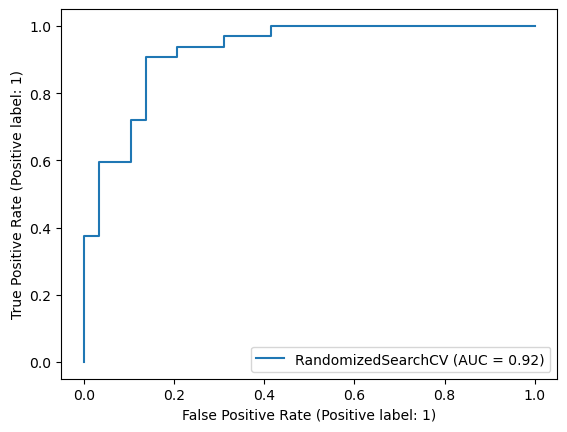

In [44]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rs_log_reg, x_test, y_test);

### confusion matrix

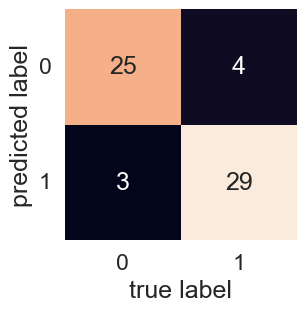

In [46]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.yticks(rotation=0)
    
plot_conf_mat(y_test, y_preds)

### Classification Report

In [47]:
pd.DataFrame(classification_report(y_test,
                                  y_preds,
                                  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.878788,0.885246,0.885823,0.885477
recall,0.862069,0.906250,0.885246,0.884159,0.885246
f1-score,0.877193,0.892308,0.885246,0.884750,0.885122
support,29.000000,32.000000,0.885246,61.000000,61.000000


In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

### Accuracy score

In [50]:
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, 
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [51]:
np.mean(cv_acc)

0.8479781420765027

### Prescion Score

In [53]:
cv_prc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, 
                         scoring="precision")
cv_prc

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [54]:
np.mean(cv_prc)

0.8215873015873015

### Recall

In [55]:
recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, 
                         scoring="recall")
recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [56]:
np.mean(recall)

0.9272727272727274

### F1-score

In [57]:
f1_score = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, 
                         scoring="f1")
f1_score

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [58]:
np.mean(f1_score)

0.8705403543192143

### Visualize the above score

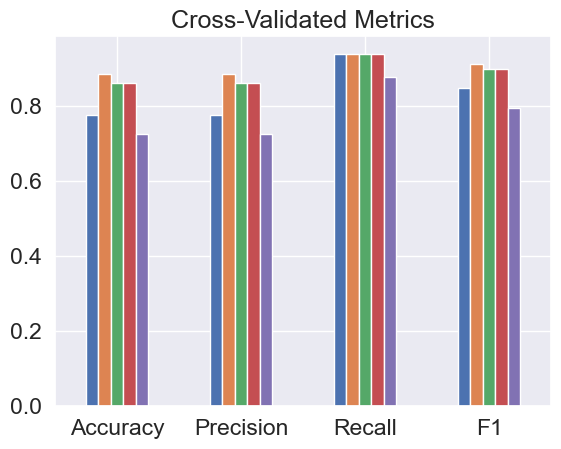

In [65]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_prc,
                            "Recall": recall,
                            "F1": f1_score},
                          )
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.xticks(rotation=0);